In [348]:
pwd

u'/Users/yusheng/Jupyter/CSC478'

#### Yusheng Zhu | CSC 478 | Homework 1 | April 12, 2018

[Assignment#1](http://facweb.cs.depaul.edu/mobasher/classes/csc478/Assignments/assign1.html)

For this assignment you will experiment with Python. NumPy, and Pandas in order to perform some basic data preprocessing and analysis tasks.

You will work with a modified subset of a real data set of customer for a bank. The data is provided in a CSV formatted file with the first row containing the attribute names. The description of the the different fields in the data are provided in this document. You must only use Python, NumPy, Pandas, Matplotlib to perform the tasks for this assignment

In [349]:
## load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [350]:
## read in the dataset
data = pd.read_csv("bank_data.csv", sep=',', index_col=0)
data.head(5)

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [351]:
data.shape

(600, 11)

In [352]:
data.dtypes

age               int64
income          float64
children          int64
gender           object
region           object
married          object
car              object
savings_acct     object
current_acct     object
mortgage         object
pep              object
dtype: object

#### 1,Explore the general characteristics of the data as a whole: examine the means, standard deviations, and other statistics associated with the numerical attributes; show the distributions of values associated with categorical attributes; etc.

In [353]:
data.describe(include="all")

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
count,600.000000,600.000000,600.000000,600,600,600,600,600,600,600,600
unique,NaN,NaN,NaN,2,4,2,2,2,2,2,2
top,NaN,NaN,NaN,MALE,INNER_CITY,YES,NO,YES,YES,NO,NO
freq,NaN,NaN,NaN,300,269,396,304,414,455,391,326
mean,42.395000,27524.031217,1.011667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,14.424947,12899.468246,1.056752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,5014.210000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,30.000000,17264.500000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,42.000000,24925.300000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,55.250000,36172.675000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Age, income, children are the 3 numerical attributes in this dataset. Their main statistics is shown in the table above.

Below is the distribution of 8 categoriacal attributes from this dataset.

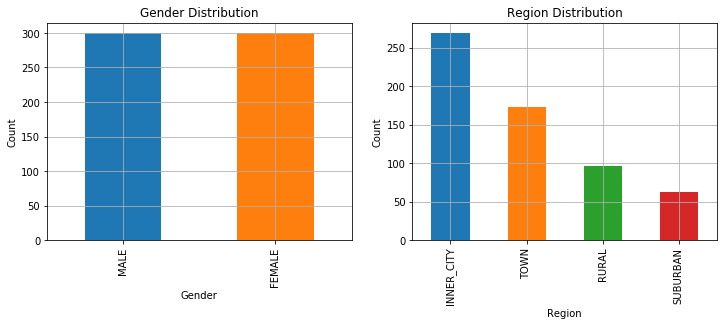

In [354]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Gender Distribution")
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count')
data.gender.value_counts().plot(kind='bar', grid=True)

ax1 = fig.add_subplot(122)
ax1.set_title("Region Distribution")
ax1.set_xlabel('Region')
ax1.set_ylabel('Count')
data.region.value_counts().plot(kind='bar', grid=True)

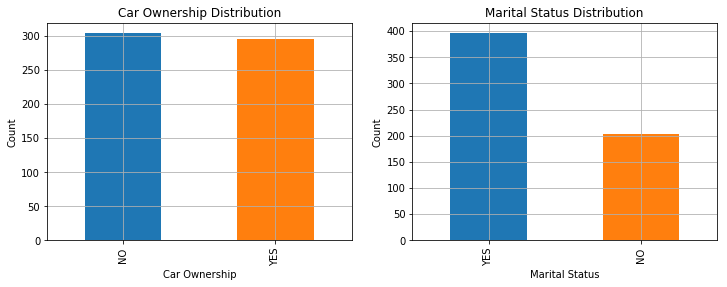

In [355]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Car Ownership Distribution")
ax1.set_xlabel('Car Ownership')
ax1.set_ylabel('Count')
data.car.value_counts().plot(kind='bar', grid=True)

ax1 = fig.add_subplot(122)
ax1.set_title("Marital Status Distribution")
ax1.set_xlabel('Marital Status')
ax1.set_ylabel('Count')
data.married.value_counts().plot(kind='bar', grid=True)

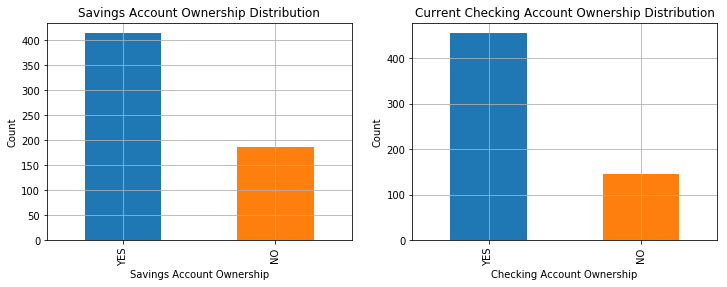

In [356]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Savings Account Ownership Distribution")
ax1.set_xlabel('Savings Account Ownership')
ax1.set_ylabel('Count')
data.savings_acct.value_counts().plot(kind='bar', grid=True)

ax1 = fig.add_subplot(122)
ax1.set_title("Current Checking Account Ownership Distribution")
ax1.set_xlabel('Checking Account Ownership')
ax1.set_ylabel('Count')
data.current_acct.value_counts().plot(kind='bar', grid=True)

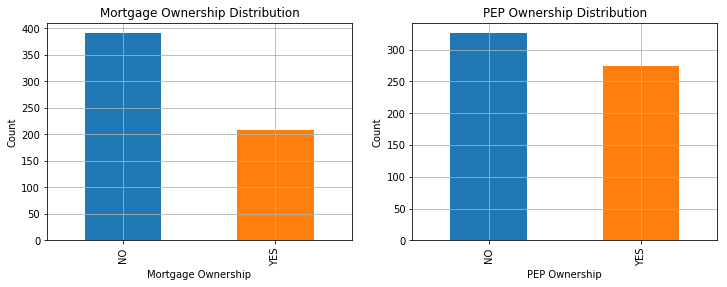

In [357]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Mortgage Ownership Distribution")
ax1.set_xlabel('Mortgage Ownership')
ax1.set_ylabel('Count')
data.mortgage.value_counts().plot(kind='bar', grid=True)


ax1 = fig.add_subplot(122)
ax1.set_title("PEP Ownership Distribution")
ax1.set_xlabel('PEP Ownership')
ax1.set_ylabel('Count')
data.pep.value_counts().plot(kind='bar', grid=True)

#### 2,Suppose that the hypothetical bank is particularly interested in customers who buy the PEP (Personal Equity Plan) product. Compare and contrast the subsets of customers who buy and don't buy the PEP. Compute summaries (as in part 1) of the selected data with respect to all other attributes. Can you observe any significant differences between these segments of customers? Discuss your observations.

In [358]:
## Comparison of numerical data

groupby_pep=data.groupby('pep')
groupby_pep.describe(exclude=np.object).T


pep                       NO           YES
age      count    326.000000    274.000000
         mean      40.098160     45.127737
         std       14.123506     14.327991
         min       18.000000     18.000000
         25%       27.000000     34.000000
         50%       40.000000     45.000000
         75%       51.000000     58.000000
         max       67.000000     67.000000
children count    326.000000    274.000000
         mean       1.067485      0.945255
         std        1.195524      0.860571
         min        0.000000      0.000000
         25%        0.000000      0.000000
         50%        0.000000      1.000000
         75%        2.000000      1.000000
         max        3.000000      3.000000
income   count    326.000000    274.000000
         mean   24900.953374  30644.919453
         std    11661.123422  13609.613043
         min     5014.210000   7756.360000
         25%    15366.475000  19639.475000
         50%    23105.000000  28080.050000
         75%    31210.900000  38458.350000
         max    61554.600000  63130.100000

<Figure size 864x288 with 0 Axes>

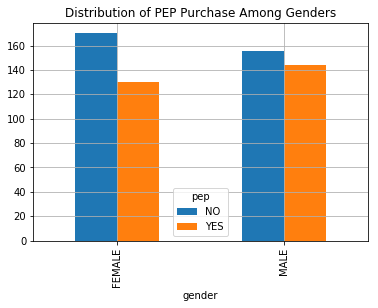

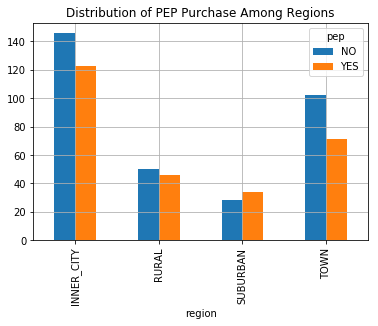

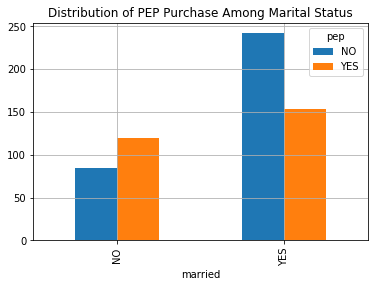

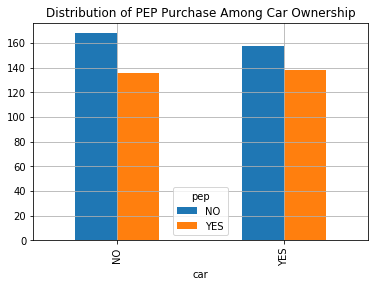

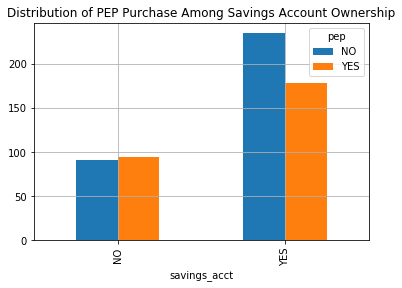

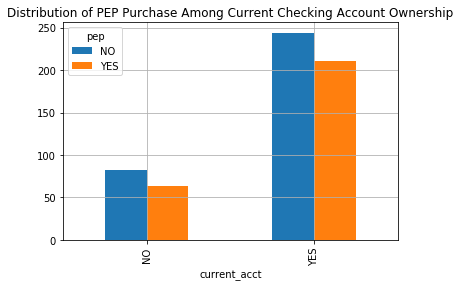

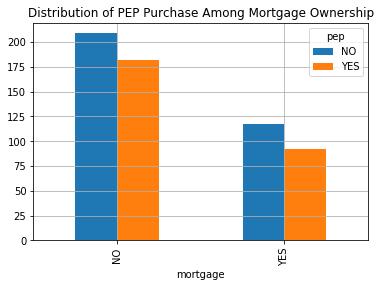

In [359]:
## Comparison of categorical data

fig = plt.figure(figsize=(12,4))

c_g = pd.crosstab(data['gender'], data['pep'])
c_r = pd.crosstab(data['region'], data['pep'])
c_m = pd.crosstab(data['married'], data['pep'])
c_c = pd.crosstab(data['car'], data['pep'])
c_sa = pd.crosstab(data['savings_acct'], data['pep'])
c_ca = pd.crosstab(data['current_acct'], data['pep'])
c_mg = pd.crosstab(data['mortgage'], data['pep'])

plt.show(c_g.plot(kind="bar", grid=True, title="Distribution of PEP Purchase Among Genders"))
plt.show(c_r.plot(kind="bar", grid=True, title="Distribution of PEP Purchase Among Regions"))
plt.show(c_m.plot(kind="bar", grid=True, title="Distribution of PEP Purchase Among Marital Status"))
plt.show(c_c.plot(kind="bar", grid=True, title="Distribution of PEP Purchase Among Car Ownership"))
plt.show(c_sa.plot(kind="bar", grid=True, title="Distribution of PEP Purchase Among Savings Account Ownership"))
plt.show(c_ca.plot(kind="bar", grid=True, title="Distribution of PEP Purchase Among Current Checking Account Ownership"))
plt.show(c_mg.plot(kind="bar", grid=True, title="Distribution of PEP Purchase Among Mortgage Ownership"))

There are a few siginificant differences between these segments of customers. Firstly,the average age of the segment who buy PEP is 5 years older than the segment who don't buy PEP. People who buy PEP are more likely to have more kids.
Also,the average income of people who buy PEP is $5743.97 higher than the the people who don't buy PEP.

Noting that most people who buy PEP are married, car owners and female, and people who buy PEP tend to have more money on their saving and checking account and have less mortgage burden.People who live in the suburban are more likely to purchase PEP while people living elsewhere are more likely to say no to PEP.
 

#### 3,Use z-score normalization to standardize the values of the income attribute. 

In [360]:
inc_mean = data["income"].mean()
inc_std = data["income"].std()
inc_norm = (data["income"]-inc_mean)/inc_std
inc_norm.head(5)

id
ID12101   -0.773523
ID12102    0.198541
ID12103   -0.848766
ID12104   -0.554180
ID12105    1.787071
Name: income, dtype: float64

#### 4,Discretize the age attribute into 3 categories (corresponding to "young", "mid-age", and "old"). [Do not change the original age attribute in the table.]

In [361]:
age_bins = pd.qcut(data.age, 3, labels=['young', 'mid-age', 'old'], retbins=True)
age_bins

(id
 ID12101    mid-age
 ID12102    mid-age
 ID12103        old
 ID12104      young
 ID12105        old
 ID12106        old
 ID12107      young
 ID12108        old
 ID12109    mid-age
 ID12110        old
 ID12111        old
 ID12112        old
 ID12113    mid-age
 ID12114        old
 ID12115    mid-age
 ID12116    mid-age
 ID12117    mid-age
 ID12118    mid-age
 ID12119        old
 ID12120      young
 ID12121        old
 ID12122        old
 ID12123        old
 ID12124      young
 ID12125      young
 ID12126        old
 ID12127    mid-age
 ID12128    mid-age
 ID12129    mid-age
 ID12130        old
             ...   
 ID12671    mid-age
 ID12672    mid-age
 ID12673      young
 ID12674    mid-age
 ID12675    mid-age
 ID12676    mid-age
 ID12677      young
 ID12678        old
 ID12679      young
 ID12680    mid-age
 ID12681        old
 ID12682      young
 ID12683    mid-age
 ID12684    mid-age
 ID12685      young
 ID12686      young
 ID12687      young
 ID12688    mid-age
 ID12689        

#### 5,Use Min-Max Normalization to transform the values of all numeric attributes  (income, age, children) in the original table (before the transforamtions in parts 3 and 4 above) onto the range 0.0-1.0.

In [362]:
min_max_norm=lambda x:(x-min(x))/(max(x)-min(x)) if(x.dtypes==np.float64 or x.dtypes==np.int64) else x
data=data.copy()
data_norm=data.apply(min_max_norm)
data_norm.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,0.612245,0.215634,0.333333,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
ID12102,0.448980,0.431395,1.000000,MALE,TOWN,YES,YES,NO,YES,YES,NO
ID12103,0.673469,0.198933,0.000000,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12104,0.102041,0.264320,1.000000,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12105,0.795918,0.783987,0.000000,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


#### 6,Convert the table (after normalization in part 5) into the standard spreadsheet format. Note that this requires converting each categorical attribute into multiple binary ("dummy") attributes (one for each values of the categorical attribute) and assigning binary values corresponding to the presence or not presence of the attribute value in the original record). The numeric attributes should remain unchanged. Save this new table into a file called bank_numeric.csv and submit it along with your assignment. [Hint: you might consider using the get_dummies for Pandas data frames.]

In [363]:
new_table = pd.get_dummies(data_norm)
new_table.to_csv("bank_numeric.csv", float_format="%1.2f")
new_table.head(5)

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
id,,,,,,,,,,,,,,,,,,,,,
ID12101,0.612245,0.215634,0.333333,1,0,1,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
ID12102,0.448980,0.431395,1.000000,0,1,0,0,0,1,0,...,0,1,1,0,0,1,0,1,1,0
ID12103,0.673469,0.198933,0.000000,1,0,1,0,0,0,0,...,0,1,0,1,0,1,1,0,1,0
ID12104,0.102041,0.264320,1.000000,1,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,1,0
ID12105,0.795918,0.783987,0.000000,1,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,1,0


#### 7,Using the standardized data set (of the previous part), perform basic correlation analysis among the attributes. Discuss your results by indicating any significant positive or negative correlations among pairs of attributes. You need to construct a complete Correlation Matrix. Be sure to first remove the Customer ID column before creating the correlation matrix. [Hint: you can create the correlation matrix by using the corr() function in Pandas or corrcoef function in NumPy].

In [364]:
new_table.corr()

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
age,1.000000,0.752726,0.023572,0.090081,-0.090081,-0.025171,0.018635,0.031345,-0.008510,-0.010394,...,-0.077733,0.077733,-0.184389,0.184389,0.035312,-0.035312,0.016154,-0.016154,-0.173825,0.173825
income,0.752726,1.000000,0.036761,0.023845,-0.023845,-0.047564,0.084776,0.029824,-0.036431,0.008386,...,-0.081556,0.081556,-0.266164,0.266164,-0.031616,0.031616,0.014662,-0.014662,-0.221991,0.221991
children,0.023572,0.036761,1.000000,0.014206,-0.014206,-0.051222,0.089902,-0.014122,-0.007033,0.048716,...,-0.036455,0.036455,-0.041536,0.041536,-0.006238,0.006238,0.074339,-0.074339,0.057663,-0.057663
gender_FEMALE,0.090081,0.023845,0.014206,1.000000,-1.000000,-0.023459,-0.009092,-0.010951,0.040472,0.021110,...,0.006667,-0.006667,0.007207,-0.007207,-0.019466,0.019466,0.066465,-0.066465,0.046843,-0.046843
gender_MALE,-0.090081,-0.023845,-0.014206,-1.000000,1.000000,0.023459,0.009092,0.010951,-0.040472,-0.021110,...,-0.006667,0.006667,-0.007207,0.007207,0.019466,-0.019466,-0.066465,0.066465,-0.046843,0.046843
region_INNER_CITY,-0.025171,-0.047564,-0.051222,-0.023459,0.023459,1.000000,-0.393444,-0.306032,-0.573814,-0.003254,...,0.018143,-0.018143,0.091373,-0.091373,-0.007894,0.007894,-0.002098,0.002098,-0.001054,0.001054
region_RURAL,0.018635,0.084776,0.089902,-0.009092,0.009092,-0.393444,1.000000,-0.148158,-0.277798,0.022649,...,-0.024006,0.024006,-0.036960,0.036960,0.008496,-0.008496,0.051908,-0.051908,-0.019714,0.019714
region_SUBURBAN,0.031345,0.029824,-0.014122,-0.010951,0.010951,-0.306032,-0.148158,1.000000,-0.216080,-0.012483,...,0.061184,-0.061184,-0.002605,0.002605,-0.038157,0.038157,-0.004635,0.004635,-0.062508,0.062508
region_TOWN,-0.008510,-0.036431,-0.007033,0.040472,-0.040472,-0.573814,-0.277798,-0.216080,1.000000,-0.006369,...,-0.041604,0.041604,-0.068654,0.068654,0.027431,-0.027431,-0.036591,0.036591,0.059115,-0.059115
married_NO,-0.010394,0.008386,0.048716,0.021110,-0.021110,-0.003254,0.022649,-0.012483,-0.006369,1.000000,...,-0.009571,0.009571,0.028604,-0.028604,-0.059996,0.059996,-0.021711,0.021711,-0.189578,0.189578


Positive correlation:

age and income [0.75]

Negative correlation:

gender_FEMALE and gender_MALE  [-1]
region_TOWN and region_INNER_CITY [-0.57]

#### 8,Using Matplotlib library and/or ploting capabilties of Pandas, create a scatter plot of the (non-normalized) Income attribute relative to Age. Be sure that your plot contains appropriate labels for the axes. Do these variables seem correlated?

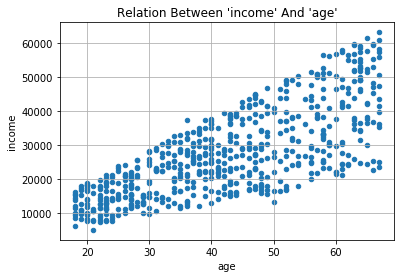

In [365]:
data.plot(x="age", y="income", kind="scatter", title="Relation Between 'income' And 'age'", grid=True)

Yes, there is a obvious postive correlation between age and income from the scatterplot.

#### 9,Create histograms for (non-normalized) Income (using 9 bins) and Age (using 15 bins).

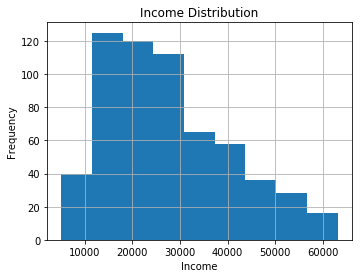

In [366]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Income Distribution")
ax1.set_xlabel('Income')
ax1.set_ylabel('Frequency')
data["income"].plot(kind="hist", bins=9, grid=True)

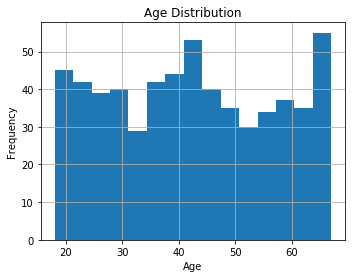

In [367]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Age Distribution")
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
data["age"].plot(kind="hist", bins=15, grid=True)

#### 10,Using a bargraph, plot the distribution of the values of the region attribute.

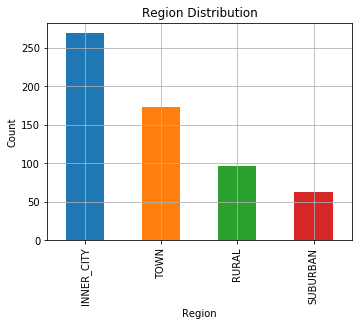

In [368]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax1.set_title("Region Distribution")
ax1.set_xlabel('Region')
ax1.set_ylabel('Count')
data['region'].value_counts().plot(kind="bar", grid=True)

#### 11,Perform a cross-tabulation of the region attribute with the pep attribute. This requires the aggregation of the occurrences of each pep value (yes or no) separately for each value of the region attribute. Show the results as a 4 by 2 (region x pep) table with entries representing the counts. [Hint: you can either use Numpy or use aggregations fucntions in Pandas such as groupby() and  cross-tab().] Then, either using Matplotlib directly or the plot() function in Pandas create a bar chart graph to visualize of the relationships between these sets of variables. [Hint: This example of creating simple bar charts using Matplotlib may be useful.]

In [369]:
c_r = pd.crosstab(data['region'], data['pep'])
c_r

pep,NO,YES
region,,
INNER_CITY,146,123
RURAL,50,46
SUBURBAN,28,34
TOWN,102,71


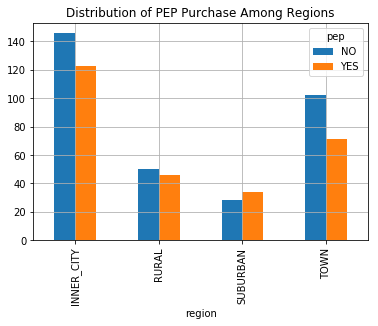

In [370]:
plt.show(c_r.plot(kind="bar", grid=True, title="Distribution of PEP Purchase Among Regions"))